In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import sys
sys.path.append('../')
from plotroutines import *

In [3]:
from tailassignment_loader import *
instances = 6
flights   = 24
solutions = 3

FR, CR, best_sol = load_FR_CR("data/" + f'FRCR_{instances}_{flights}_{solutions}.txt')

In [4]:
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.ExactCover(
        FR=FR,
        CR=CR
    ),
    mixer=mixers.X()
)

In [5]:
import itertools
print(FR)
nL=FR.shape[1]
print("solutions:")
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =nL)]:
    costs.append(-qaoa.problem.cost(s))
    if qaoa.problem.isFeasible(s):
        print(s, -qaoa.problem.cost(s))

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]
solutions:
000011 7.0
001100 10.0
110000 6.0


2023-09-27 14:29:44 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-27 14:29:44 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-27 14:29:44 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-27 14:29:44 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-27 14:29:47 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-27 14:29:47 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


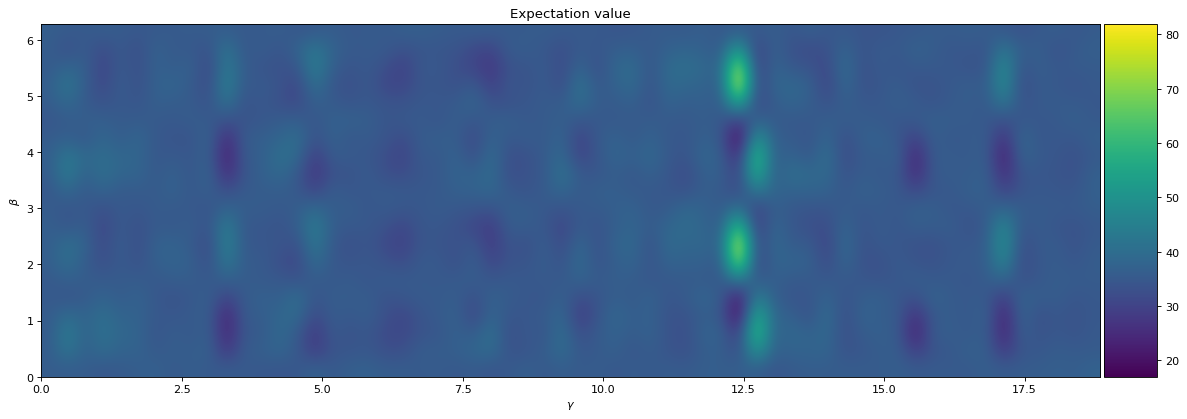

In [6]:
fig = pl.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k');
qaoa.sample_cost_landscape(angles={"gamma": [0,6*np.pi,60], "beta": [0,2*np.pi,20]})
plot_E(qaoa, fig=fig)

In [7]:
maxdepth=10
qaoa.optimize(depth=maxdepth)

2023-09-27 14:29:48 [info     ] cost(depth 1 = 16.876953125000004 file=qaoa.qaoa func=optimize
2023-09-27 14:29:48 [info     ] cost(depth 2 = 16.865234374999993 file=qaoa.qaoa func=optimize
2023-09-27 14:29:49 [info     ] cost(depth 3 = 14.125          file=qaoa.qaoa func=optimize
2023-09-27 14:29:50 [info     ] cost(depth 4 = 18.055664062500004 file=qaoa.qaoa func=optimize
2023-09-27 14:29:51 [info     ] cost(depth 5 = 13.190429687500002 file=qaoa.qaoa func=optimize
2023-09-27 14:29:53 [info     ] cost(depth 6 = 18.32421875     file=qaoa.qaoa func=optimize
2023-09-27 14:29:55 [info     ] cost(depth 7 = 30.62109374999999 file=qaoa.qaoa func=optimize
2023-09-27 14:29:57 [info     ] cost(depth 8 = 23.394531250000004 file=qaoa.qaoa func=optimize
2023-09-27 14:30:01 [info     ] cost(depth 9 = 28.80078125     file=qaoa.qaoa func=optimize
2023-09-27 14:30:04 [info     ] cost(depth 10 = 30.156249999999996 file=qaoa.qaoa func=optimize


In [8]:
min_cost, max_cost = qaoa.problem.computeMinMaxCosts()
min_cost, max_cost

(6.0, 10.0)

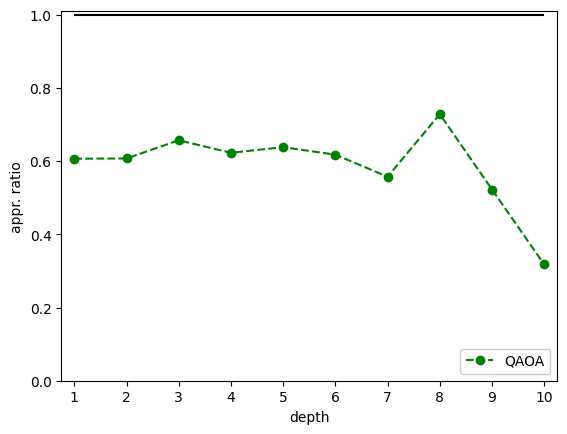

In [9]:
plot_Exp(qaoa, maxdepth, mincost=min_cost, maxcost=max_cost, label="QAOA", style="o--g",shots=1024)

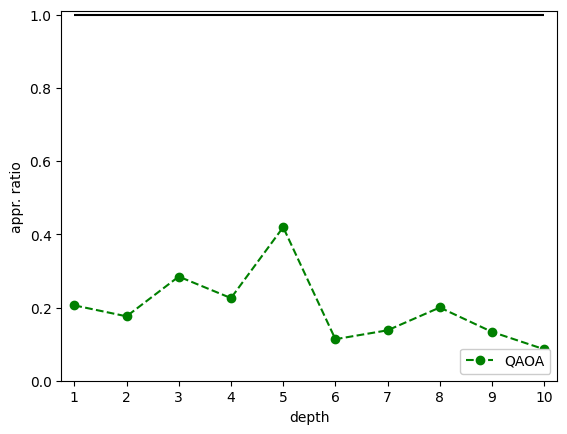

In [10]:
plot_successprob(qaoa, maxdepth, label="QAOA", style="o--g")

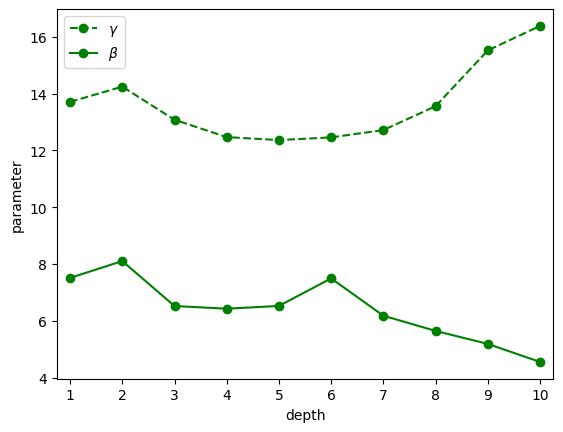

In [11]:
plot_angles(qaoa, maxdepth, label="", style="og")